In [1]:
import pandas as pd 
import numpy as np 
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
img_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset/dota1_ms_val/images"
ann_folder = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset/dota1_ms_val/annfiles"

In [3]:
len( os.listdir(img_folder) )

35462

In [4]:
img_files = sorted(glob(img_folder+"/*.png"))
ann_files = sorted(glob(ann_folder+"/*.txt"))

In [5]:
img = img_files[0]
ann = ann_files[0]

In [6]:
with open(ann) as f:
    ann_lines = f.readlines()
print(ann_lines)
print(len(ann_lines))

['937.0 913.0 921.0 912.0 923.0 874.0 940.0 875.0 small-vehicle 0\n', '638.0 959.0 638.0 935.0 694.0 939.0 693.0 962.0 large-vehicle 0\n', '545.0 494.0 548.0 518.0 489.0 519.0 488.0 493.0 large-vehicle 0\n', '536.0 468.0 535.0 489.0 477.0 486.0 478.0 464.0 large-vehicle 0\n', '683.0 302.0 659.0 309.0 643.0 213.0 660.0 205.0 large-vehicle 0\n', '627.0 319.0 605.0 326.0 584.0 223.0 608.0 216.0 large-vehicle 0\n', '594.0 323.0 573.0 328.0 556.0 234.0 575.0 229.0 large-vehicle 0\n', '563.0 326.0 540.0 333.0 527.0 238.0 547.0 232.0 large-vehicle 0\n', '521.0 334.0 500.0 341.0 478.0 241.0 500.0 236.0 large-vehicle 0\n', '422.0 349.0 401.0 356.0 382.0 258.0 402.0 253.0 large-vehicle 0\n', '396.0 358.0 375.0 366.0 356.0 269.0 374.0 263.0 large-vehicle 0\n', '360.0 359.0 340.0 363.0 326.0 278.0 347.0 273.0 large-vehicle 0\n', '329.0 352.0 305.0 356.0 292.0 274.0 313.0 272.0 large-vehicle 0\n', '277.0 842.0 278.0 823.0 335.0 827.0 332.0 853.0 large-vehicle 0\n', '573.0 519.0 579.0 494.0 638.0 49

In [7]:
poly_box = [float(i) for i in ann_lines[2].split()[0:8]]
#poly_box = [631.0 ,4431.0 ,678.0 ,4322.0 ,813.0 ,4368.0 ,755.0 ,4485.0]

In [8]:
p1 = np.asarray(poly_box)

In [9]:
p1.shape

(8,)

In [10]:
p1 = p1.reshape((4,2))

In [11]:
p1

array([[545., 494.],
       [548., 518.],
       [489., 519.],
       [488., 493.]])

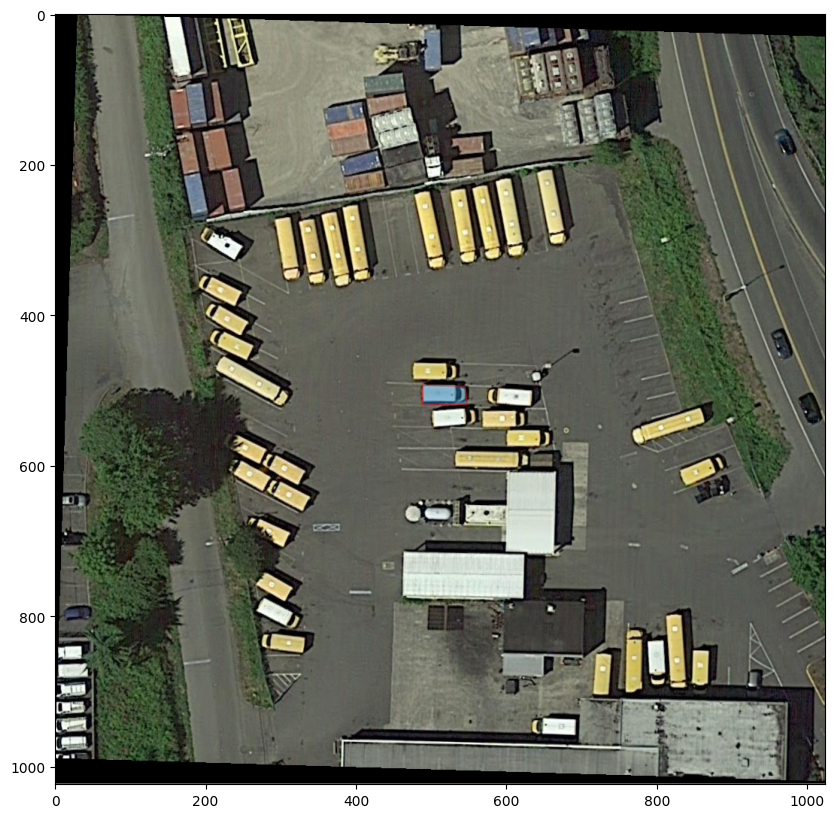

In [12]:
vertices = p1
polygon = patches.Polygon(vertices, closed=True, fill=True, edgecolor='r', alpha=0.5)
fig,ax = plt.subplots(figsize=(15,10))
ax.add_patch(polygon)

img_ = Image.open(img)
plt.imshow(img_)

In [13]:
# cut out 1 instance 

# method 1 : crop mask out  
# 문제는 배경이 너무 많이 들어가서.. 

# method 2 : poly to rectangle 
# 배경을 제외시킨 상태에서 mask out 으로 하면은 배경의 영향을 거의 받지 않을 수 있음 


In [18]:
img

'/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset/dota1_ms_val/images/P0003__1024__0___0.png'

In [19]:
vertices

array([[545., 494.],
       [548., 518.],
       [489., 519.],
       [488., 493.]])

In [15]:
from shapely.geometry import Polygon
import cv2

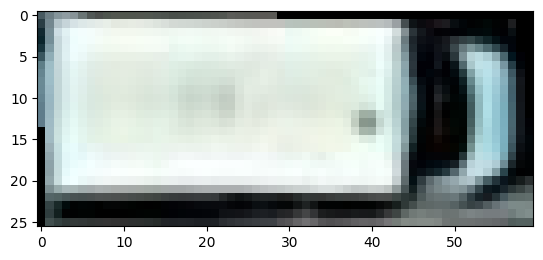

In [30]:
# Example polygon coordinates (replace with actual polygon coordinates)
polygon_coords = vertices

# Create a Shapely Polygon object
polygon = Polygon(polygon_coords)

# Assuming `image` is your original image
image = cv2.imread(img)

# Create a mask image with the same shape as the original image
mask = np.zeros_like(image[:, :, 0], dtype=np.uint8)

# Draw the filled polygon on the mask
cv2.fillPoly(mask, [np.array(polygon_coords, dtype=np.int32)], color=255)

# Bitwise AND operation to get the cropped region
cropped_image = cv2.bitwise_and(image, image, mask=mask)

# mask to rectangle
xs, ys = [i[0] for i in vertices], [i[1] for i in vertices]
x_max,x_min = int(max(xs)), int(min(xs))
y_max,y_min = int(max(ys)), int(min(ys))

width = x_max, x_min
height = y_max, y_min

cropped_image_rec = cropped_image[ y_min:y_max, x_min:x_max, :]

# Display the result
cv2.imwrite('crop_mask_rec3.png',cropped_image_rec)
plt.imshow(cropped_image_rec)
#cv2.imshow('Cropped Image', cropped_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()